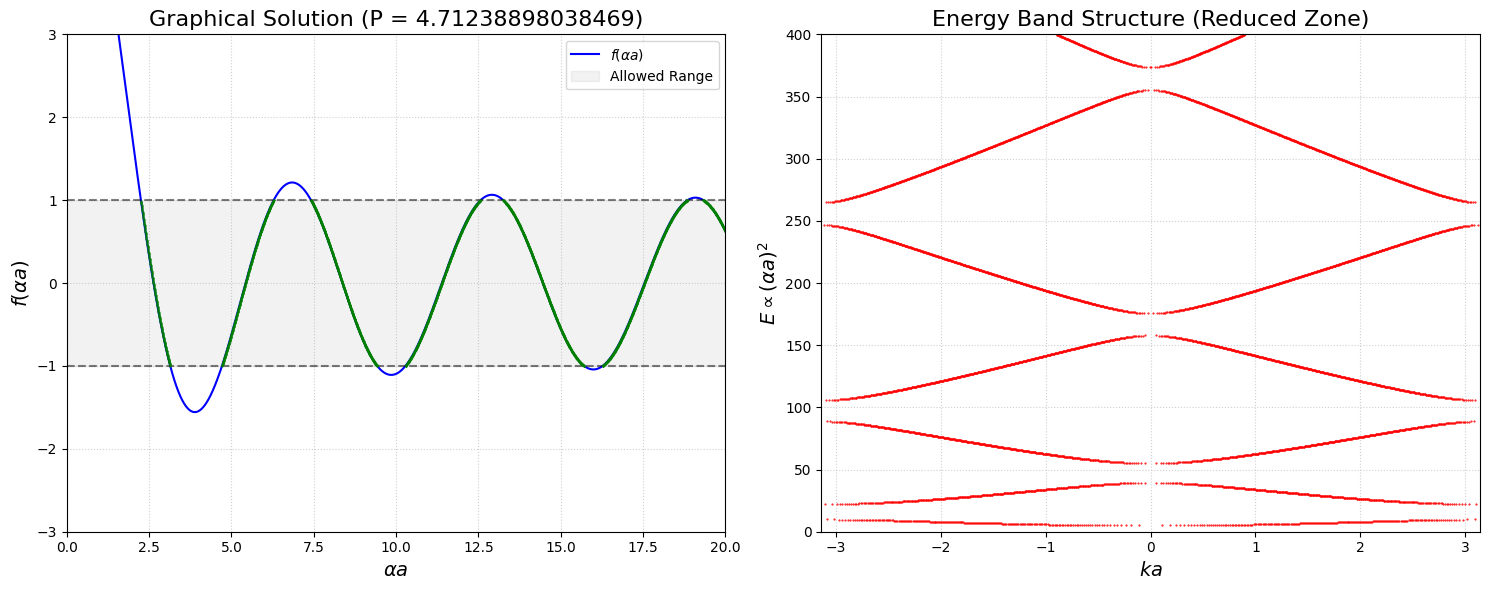

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def kronig_penney_model(P, max_alpha_a=20, num_points=5000):
    alpha_a = np.linspace(1e-4, max_alpha_a, num_points)
    
    rhs = np.cos(alpha_a) + P * np.sin(alpha_a) / alpha_a
    
    allowed_indices = np.where(np.abs(rhs) <= 1)[0]
    forbidden_indices = np.where(np.abs(rhs) > 1)[0]
    
    k_a = np.arccos(np.clip(rhs[allowed_indices], -1, 1))
    energy = alpha_a[allowed_indices]**2
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    ax1 = axes[0]
    ax1.plot(alpha_a, rhs, 'b-', label=r'$f(\alpha a)$', linewidth=1.5)
    ax1.axhline(1, color='k', linestyle='--', alpha=0.5)
    ax1.axhline(-1, color='k', linestyle='--', alpha=0.5)
    ax1.fill_between(alpha_a, -1, 1, color='gray', alpha=0.1, label='Allowed Range')
    
    for idx in allowed_indices:
        ax1.plot(alpha_a[idx], rhs[idx], 'g.', markersize=1)
        
    ax1.set_ylim(-3, 3)
    ax1.set_xlim(0, max_alpha_a)
    ax1.set_xlabel(r'$\alpha a$', fontsize=14)
    ax1.set_ylabel(r'$f(\alpha a)$', fontsize=14)
    ax1.set_title(f'Graphical Solution (P = {P})', fontsize=16)
    ax1.legend(loc='upper right')
    ax1.grid(True, linestyle=':', alpha=0.6)

    ax2 = axes[1]
    ax2.plot(k_a, energy, 'r.', markersize=1, label='Dispersion')
    ax2.plot(-k_a, energy, 'r.', markersize=1)
    
    ax2.set_xlim(-np.pi, np.pi)
    ax2.set_ylim(0, max_alpha_a**2)
    ax2.set_xlabel(r'$ka$', fontsize=14)
    ax2.set_ylabel(r'$E \propto (\alpha a)^2$', fontsize=14)
    ax2.set_title('Energy Band Structure (Reduced Zone)', fontsize=16)
    ax2.grid(True, linestyle=':', alpha=0.6)
    
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    P_value = 3 * np.pi / 2
    kronig_penney_model(P_value)